<a href="https://colab.research.google.com/github/cdstreiff/MAT421---Applied-Computational-Methods/blob/main/421SectionF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section F HW - MAT 421
Carson Streiff - Spring 2022

### Derivative Generator
This function my_der_calc takes a function f, two real numbers a and b, a positive integer value N, and an option string as input. It essentially calculates the derivative of the function f at N points between a and b using either forward, backward, or central finite differences as specified by the option string. It returns an array of the derivative values as well as an array of the x values that were valid for derivative calculation, as we will lose certain points depending on the method used.

In [178]:
import numpy as np
import matplotlib.pyplot as plt


def my_der_calc(f,a,b,N,option):
  x = np.linspace(a,b,N)
  y = f(x)


  if(option == "forward"):
    #forward difference loses the last point
    df = np.zeros(len(x)-1)
    X = np.zeros(len(x) -1)

    for i in range(0,len(df)):
      df[i] = (y[i+1] - y[i]) / (x[i+1] - x[i])
      X[i] = x[i]

    return [df, X]


  if(option == "backward"):
    #backward difference loses the first point
    df = np.zeros(len(x)-1)
    X = np.zeros(len(x) -1)


    for i in range(1,len(x)):
      df[i-1] = (y[i] - y[i-1]) / (x[i] - x[i-1])
      X[i-1] = x[i]

    return [df, X]

  if(option == "central"):
    #central difference loses the first and last points
    df = np.zeros(len(x)-2)
    X = np.zeros(len(x) -2)


    for i in range(1,len(x)-1):
      df[i-1] = (y[i+1] - y[i-1]) / (x[i+1] - x[i-1])
      X[i-1] = x[i]

    return [df, X]
    

### Testing the derivative generator
Here we compare the forward, backward, and centered finite differences computed by the function above to the true derivative of a given function. Here we use the function f(x) = cos(x) + 3sin(-2x). As we can see the forward difference lags begind the true value, the backward difference leads the true value, and the centered difference is somewhere in between.

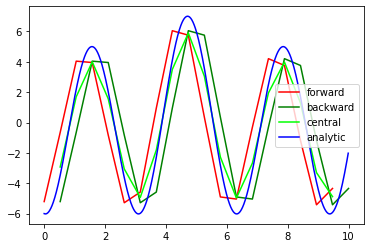

In [179]:
f = lambda x: np.cos(x) + 3* np.sin(-2*x)
forward = my_der_calc(f,0,10,20,"forward")
backward = my_der_calc(f,0,10,20,"backward")
central = my_der_calc(f,0,10,20,"central")

plt.plot(forward[1],forward[0],'r',label='forward')
plt.plot(backward[1],backward[0],'g',label='backward')
plt.plot(central[1],central[0],'lime',label='central')

x = np.arange(0,10,0.01)
y = -np.sin(x) + -6 * np.cos(-2*x)
plt.plot(x,y,'b',label='analytic')
plt.legend()

### More testing
In this test we will see how the resolution of our calculations increases the accuracy. Here we are taking the derivative of f(x) = sin(e^x). As we can see, increasing the density of points used to numerically evaluate the derivative allows us to approach the analytic value.

This example shows how the central difference with 10, 15, and 40 points approaches the true derivative of f(x) = (e^x)cos(e^x).

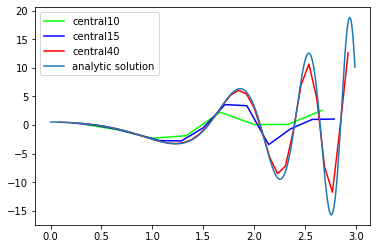

In [180]:
f = lambda x: np.sin(np.exp(x))
central10 = my_der_calc(f,0,3,10,"central")
central15 = my_der_calc(f,0,3,15,"central")
central40 = my_der_calc(f,0,3,40,"central")


plt.plot(central10[1],central10[0],'lime',label='central10')
plt.plot(central15[1],central15[0],'b',label='central15')
plt.plot(central40[1],central40[0],'r',label='central40')


df = lambda x: np.exp(x)*np.cos(np.exp(x))
x = np.arange(0,3,0.01)
y = df(x)

plt.plot(x,y,label='analytic solution')
plt.legend()



### Smoothing
This algorithm smooths a given function by taking the average of neighboring points. The 'range' of this smoothing can be specified.

In [181]:
def smooth(x,y,n):
  y_smooth = np.zeros(len(y)-2*n)
  X = np.zeros(len(y)-2*n)


  for i in range(n,len(y)-n):
    # print(y[i])
    y_smooth[i-n] = np.mean(y[i-n:i+n+1])
    X[i-n] = x[i]


  return [y_smooth,X]


x = np.arange(1,11)
y = np.arange(1,11)
smooth(x,y,4)

[array([5., 6.]), array([5., 6.])]

### Testing the smoothing algorithm
Here we test the smoothing function by first generating a noisy function, here we use f(x) = xsin(x) + some randomness. We can smooth out the original function with a smoothing range, here we use 9 (the larger the smoothing range the smoother the function, however we do lose some data with larger smoothing ranges). We can see the results of this smoothing in the first plot. From there we use forward differences to take the derivative of both the original and smoothed plots, and compare them to the true value of f(x) = sin(x) + xcos(x) as we can see in the second plot.

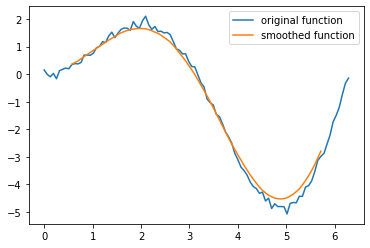

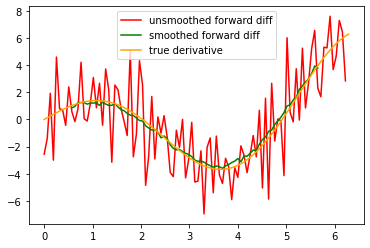

In [182]:
x = np.linspace(0, 2*np.pi, 100)
y = (x * np.sin(x)) + np.random.randn(len(x))/10
smoothingRange = 9

plt.plot(x,y,label='original function')
smooth_x = smooth(x,y,smoothingRange)[1]
smooth_y = smooth(x,y,smoothingRange)[0]
plt.plot(smooth_x,smooth_y,label='smoothed function')
plt.legend()


plt.figure()

plt.plot(x[:-1], (y[1:] - y[:-1])/(x[1]-x[0]), 'r', \
    label = 'unsmoothed forward diff')

plt.plot(smooth_x[:-1], (smooth_y[1:] - smooth_y[:-1])/(smooth_x[1]-smooth_x[0]), 'g', \
    label = 'smoothed forward diff')

dy = np.sin(x) + x * np.cos(x)
plt.plot(x,dy,'orange',label='true derivative')


plt.legend()




